<a href="https://colab.research.google.com/github/desertzk/pythondemo/blob/master/Copy_of_%E7%AC%AC%E4%BA%94%E8%AC%9B%EF%BC%9A%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%9F%BA%E6%9C%AC%E5%8E%9F%E7%90%86(%E6%A1%88%E4%BE%8B%EF%BC%9A%E8%80%81%E5%B8%AB%E4%BB%80%E9%BA%BC%E6%99%82%E5%80%99%E8%A6%81%E4%B8%8B%E8%AA%B2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

這份程式碼根據投影片的資料（如頁數、字數等）來預測李宏毅老師這堂課的講課時間，並以此案例簡介機器學習與深度學習的基本原理。基本上，這個案例並沒有實際的應用價值。

因為這個案例可用的訓練資料（training data）和驗證資料（validation data）都非常少，只要稍微改變一下超參數（hyperparameter），就可能導致結果產生非常大的變異。另外，由於資料量不足，也很容易在訓練資料甚至驗證資料上發生過擬合（overfitting）。因此，對最後跑出來的結果別太當真，這個範例程式所訓練出的模型，可能無法精確預測李宏毅老師未來上課的時長。

In [1]:
# 匯入必要的函式庫
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#《機器學習 2021》相關資料
page_2021 = np.array([61, 29, 16, 21, 19, 9, 35, 43, 14, 60, 95 ,67, 38 ,39 ,42, 16, 64, 34, 37, 57]) #投影片頁數
duration_2021 = np.array([109, 51, 34, 31, 38,19 ,56, 74, 31, 93, 160, 99, 49, 76, 72, 35, 165, 68, 86, 78]) #課程時長(分鐘)

#《生成式人工智慧導論2024》相關資料
page_2024 =    np.array([27, 22, 27, 50, 49, 16, 24, 37, 33, 27, 36, 27, 36 ,30 ,16 ,41 ,62, 34  ]) #投影片頁數
word_2024 = np.array([ 2236, 1457,1309, 3404,2513,764,1448,2327,2006,1224,1121,1042,1040,1029, 1048,1946,2631,1846 ]) #投影片總字數
duration_2024 =    np.array([35, 30, 26, 35, 47 ,25, 35 ,38 ,37, 25, 38, 45, 46, 32, 15, 45 ,87, 38]) #課程時長(分鐘)

#《生成式人工智慧與機器學習導論2025》相關資料 (第0講到第4講)
page_2025 = np.array([27,35,77,69,97]) #投影片頁數
word_2025  = np.array([2616,2042,2665,2317,3923]) #投影片總字數
duration_2025 = np.array([31,48,95,82,120]) #課程時長(分鐘)

## 設定接下來要用的訓練資料和測試資料

*   《機器學習 2021》為訓練資料
*   《生成式人工智慧與機器學習導論2025》為驗證資料



In [3]:
#訓練資料
x1_train = page_2021 #函式輸入
y_train = duration_2021 #正確答案

#驗證資料
x1_val = page_2025 #函式輸入
y_val = duration_2025 #正確答案

## 機器學習第一步：我們要什麼

先定義好 Loss 的計算方式，我們使用均方誤差（MSE），函式的預測值與真實值之間的差距越小越好。

In [4]:
# Define Loss function (Mean Squared Error)
def mean_squared_error(y_pred, y_true):
    """
    Calculate Mean Squared Error
    y_pred: Model's predicted values (a vector)
    y_true: True label values (a vector)
    """
    return np.mean((y_pred - y_true)**2)

In [5]:
#如果有一個很爛的函式，輸出根本是隨機的，那 Loss 就會很大
predict_random = np.array([10, 541, 3, 3, 3, 1 , 156, 704, 1, 99, 100, 19, 47, 743, 74, 324, 16, 6, 8, 7])
loss_random = mean_squared_error(predict_random,y_train)
print(loss_random)

61830.95


In [6]:
#如果有一個函式輸出跟正確答案一模一樣，那 Loss 會是 0
predict_perfect = y_train
loss_perfect = mean_squared_error(predict_perfect,y_train)
print(loss_perfect)

0.0


## 機器學習第二步：劃出選擇範圍

我們假設一個線性模型如下：

$y = w_1 x_1 + b$

其中：

- $y$：課程長度  
- $x_1$：投影片頁數  
- $w_1$、$b$：未知參數  

選擇不同的 $w_1$ 和 $b$，就會產生不同的函式，而所有由 $w_1$ 和 $b$ 所產生的函式所組成的集合，就是我們在模型中可以選擇的 **函式範圍**。





In [7]:
# 定義我們的模型 (線性模型)
def linear_model(x1, w1, b):
    """
    線性模型的預測函式
    x1: 輸入特徵 (投影片頁數)
    w1, b: 參數
    """
    return w1 * x1 + b

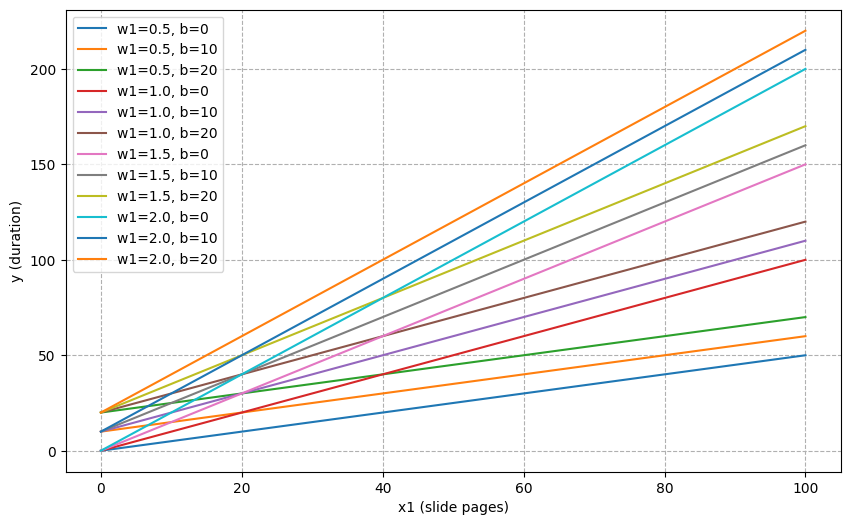

In [8]:
# 畫出一些不同 w1 和 b 組合下的函式

# 定義一些不同的 w1 和 b 值
w1_values = [0.5, 1.0, 1.5, 2.0]
b_values = [0, 10, 20]

# 產生一系列 x 值用於繪圖
x_plot = np.linspace(0, 100, 100) # 從 0 到 100 產生 100 個點

plt.figure(figsize=(10, 6))

# 用不同的 w1 和 b 組合繪製對應的直線
for w1 in w1_values:
    for b in b_values:
        y_plot = linear_model(x_plot, w1, b)
        plt.plot(x_plot, y_plot, label=f'w1={w1}, b={b}')

# 畫圖
plt.xlabel('x1 (slide pages)')
plt.ylabel('y (duration)')
plt.legend()
plt.grid(linestyle='--')
plt.show()

## 機器學習第三步：找出最好的函式

找出可以讓 Loss 最低的 $w_1$ 和 $b$ 的組合

讓我們先用最笨但最直觀的方法：暴力窮舉。我們會嘗試一定範圍內所有 $w_1$ 和 $b$ 的組合，並計算每一組合對應的 Loss。將這些 Loss 畫出來，就能看到一個碗狀的「Loss Surface」。我們的目標，就是找到這個碗的最低點。

In [9]:
# 建立範圍
w1_range = np.linspace(0, 3, 100)
b_range = np.linspace(0, 20, 300)

# 建立空的 Loss 矩陣
losses = np.zeros((len(b_range), len(w1_range)))

# 逐一計算每個 (w, b) 的 loss
for i, b in enumerate(b_range):
    for j, w in enumerate(w1_range):
        y_pred = linear_model(x1_train, w, b)
        loss = mean_squared_error(y_pred, y_train)
        losses[i, j] = loss

print(losses)

[[6597.1        6380.44940312 6167.55821855 ... 3085.81579431
  3233.828191   3385.6       ]
 [6587.57939061 6371.09013963 6158.36030096 ... 3091.94573726
  3240.11947986 3392.05263476]
 [6578.06772967 6361.73982459 6149.17133182 ... 3098.08462867
  3246.41971716 3398.51421796]
 ...
 [4162.81689355 3994.08602911 3829.11457698 ... 5299.74673468
  5495.67886381 5695.37040525]
 [4155.95397255 3987.38445401 3822.57434778 ... 5308.53436603
  5504.62784106 5704.4807284 ]
 [4149.1        3980.69182736 3816.04306703 ... 5317.33094582
  5513.58576676 5713.6       ]]


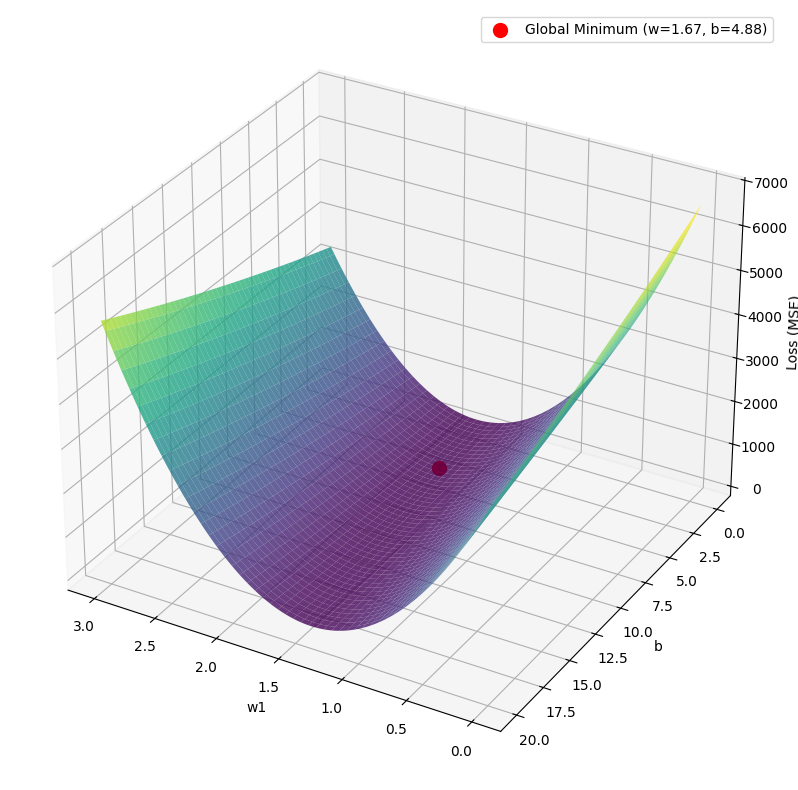

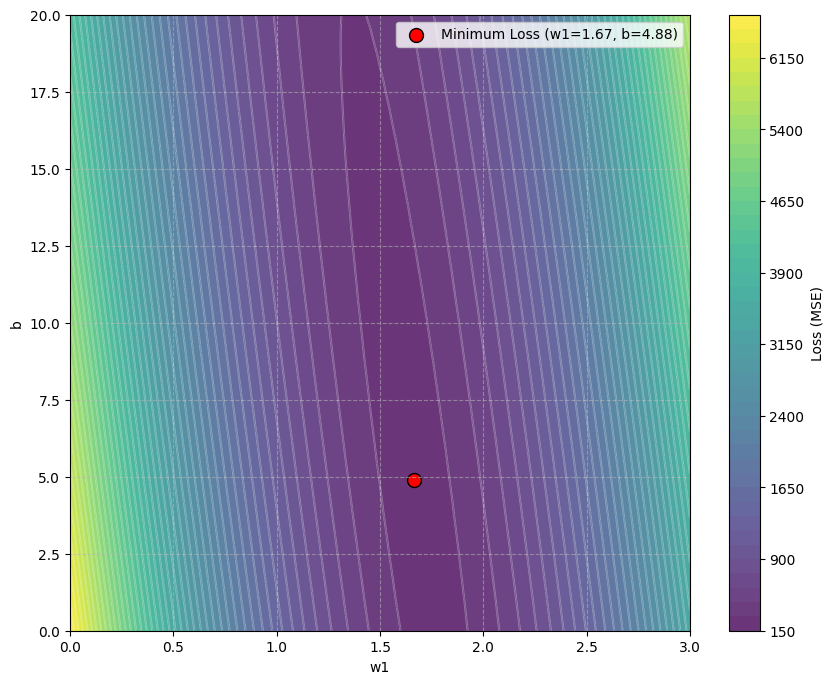

透過暴力法找到的最佳參數: w ≈ 1.67, b ≈ 4.88, 對應的最小 Loss ≈ 240.36


In [10]:
# --- 繪製 Loss Surface ---

# 1. 3D 曲面圖
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')
W, B = np.meshgrid(w1_range, b_range)
ax.plot_surface(W, B, losses, cmap='viridis', alpha=0.8)
ax.set_xlabel('w1')
ax.set_ylabel('b')
ax.set_zlabel('Loss (MSE)')
ax.view_init(elev=30, azim=120)

# 標示出最低點
min_loss_idx = np.unravel_index(np.argmin(losses), losses.shape) #找出 losses 陣列中「最小值的位置」
min_w = W[min_loss_idx]
min_b = B[min_loss_idx]
min_loss = losses[min_loss_idx]
ax.scatter(min_w, min_b, min_loss, color='red', s=100, label=f'Global Minimum (w={min_w:.2f}, b={min_b:.2f})')
ax.legend()

plt.show()


# 2. D 等高線圖 (Contour Plot)
plt.figure(figsize=(10, 8))
contour = plt.contourf(W, B, losses, levels=50, cmap='viridis', alpha=0.8)
plt.contour(W, B, losses, levels=50, colors='white', alpha=0.3)
plt.colorbar(contour, label='Loss (MSE)')
plt.xlabel('w1')
plt.ylabel('b')

# 標示出最低點
plt.scatter(min_w, min_b, color='red', s=100, edgecolor='black', label=f'Minimum Loss (w1={min_w:.2f}, b={min_b:.2f})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"透過暴力法找到的最佳參數: w ≈ {min_w:.2f}, b ≈ {min_b:.2f}, 對應的最小 Loss ≈ {min_loss:.2f}")

我們的任務（找到最好的 $w_1$、$b$），等價於在上面的等高線圖中找到海拔最低的山谷。根據 Gradient Descent 的概念，我們可以從任意一點出發，沿著「下坡」的方向前進，最終走到最低點。上面的等高線圖看起來蠻簡單的，應該不難吧……

In [11]:
# --- 實作 Gradient Descent ---

# 1. 初始參數
w1 = 1
b = 15

# 用來記錄訓練過程的 list
w1_history = []
b_history = []
loss_history = []
w1_history.append(w1)
b_history.append(b)
y_pred = linear_model(x1_train, w1, b)
current_loss = mean_squared_error(y_pred, y_train)
loss_history.append(current_loss)

# 2. 設定超參數 (Hyperparameters)
learning_rate = 0.0001  # 學習率 (Learning Rate)，這個值很關鍵！#要設多少? 0.001? 0.0001? 0.00001?
#學習率太大：步伐過大，可能一步就跨過山谷，跑到對面更高的山坡上，導致 Loss 不降反升，甚至發散。
#學習率太小：就像蝸牛在爬，雖然方向很穩，但走到谷底可能要天荒地老。
epochs = 10000      # 訓練回合數

# 3. 訓練迴圈開始
N = float(len(x1_train)) # 資料點的數量
for epoch in range(epochs):

    # a. 計算梯度 (偏微分的結果)
    y_pred = linear_model(x1_train, w1, b)
    grad_w1 = (2/N) * np.sum((y_pred - y_train) * x1_train)
    grad_b = (2/N) * np.sum(y_pred - y_train)

    # b. 更新參數 (更新大小取決於學習率大小和梯度大小)
    w1 = w1 - learning_rate * grad_w1
    b = b - learning_rate * grad_b

    # c. 記錄下目前的參數和 loss
    w1_history.append(w1)
    b_history.append(b)
    y_pred = linear_model(x1_train, w1, b)
    current_loss = mean_squared_error(y_pred, y_train)
    loss_history.append(current_loss)

    # 印出目前狀況
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {current_loss:.4f}, w1: {w1:.4f}, b: {b:.4f}")

print("\n--- 訓練完成 ---")
print(f"最終訓練結果: w1 ≈ {w1:.4f}, b ≈ {b:.4f}")

w1_linear_final=w1
b_linear_final=b

Streaming output truncated to the last 5000 lines.
Epoch [5004/10000], Loss: 255.2549, w1: 1.5097, b: 12.9486
Epoch [5005/10000], Loss: 255.2536, w1: 1.5097, b: 12.9482
Epoch [5006/10000], Loss: 255.2522, w1: 1.5097, b: 12.9478
Epoch [5007/10000], Loss: 255.2509, w1: 1.5097, b: 12.9475
Epoch [5008/10000], Loss: 255.2495, w1: 1.5097, b: 12.9471
Epoch [5009/10000], Loss: 255.2482, w1: 1.5097, b: 12.9467
Epoch [5010/10000], Loss: 255.2468, w1: 1.5097, b: 12.9464
Epoch [5011/10000], Loss: 255.2455, w1: 1.5098, b: 12.9460
Epoch [5012/10000], Loss: 255.2441, w1: 1.5098, b: 12.9456
Epoch [5013/10000], Loss: 255.2428, w1: 1.5098, b: 12.9453
Epoch [5014/10000], Loss: 255.2414, w1: 1.5098, b: 12.9449
Epoch [5015/10000], Loss: 255.2401, w1: 1.5098, b: 12.9445
Epoch [5016/10000], Loss: 255.2388, w1: 1.5098, b: 12.9442
Epoch [5017/10000], Loss: 255.2374, w1: 1.5098, b: 12.9438
Epoch [5018/10000], Loss: 255.2361, w1: 1.5098, b: 12.9434
Epoch [5019/10000], Loss: 255.2347, w1: 1.5098, b: 12.9431
Epoch

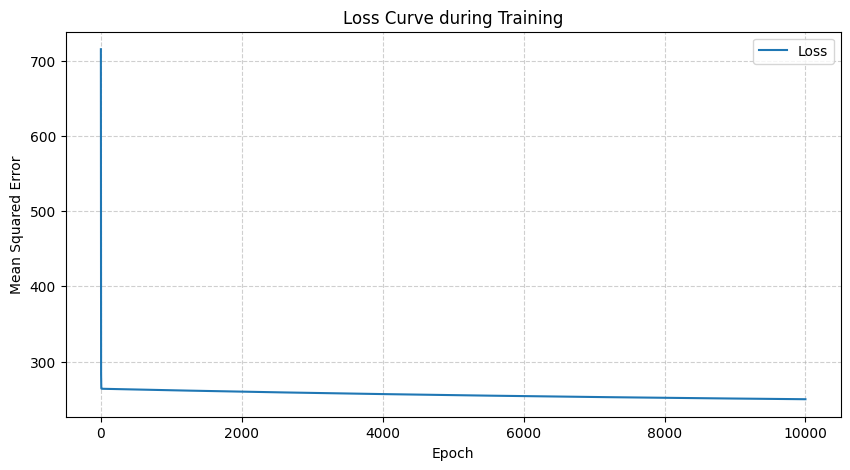

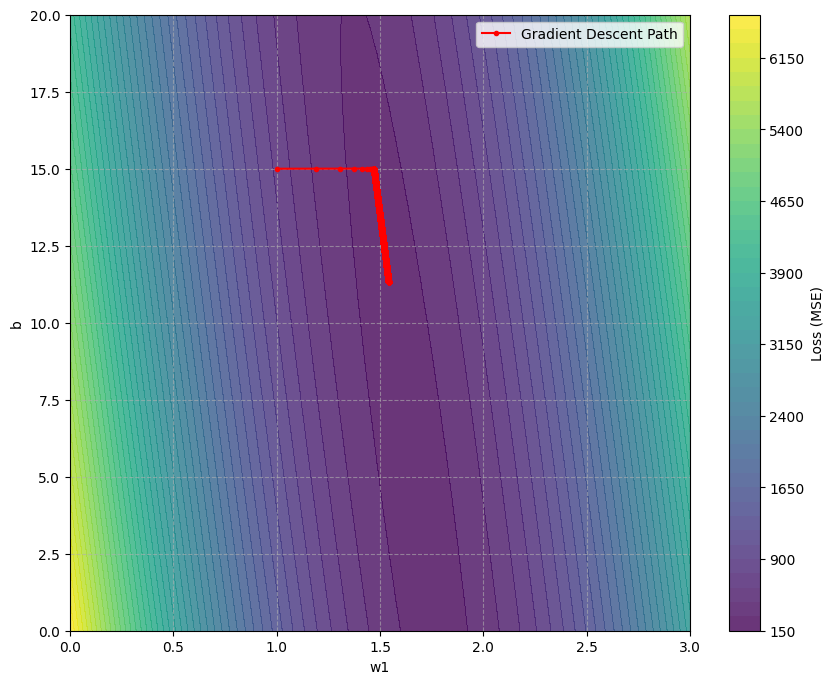

In [12]:
# --- 視覺化訓練過程 ---

# 1. 畫出 Loss 下降的曲線
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 2. 在 Loss Surface 上畫出梯度下降的路徑
plt.figure(figsize=(10, 8))
contour = plt.contourf(W, B, losses, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Loss (MSE)')
plt.plot(w1_history, b_history, 'r-o', markersize=3, label='Gradient Descent Path' ) #
#plt.title('Gradient Descent Path on Error Surface')
plt.xlabel('w1')
plt.ylabel('b')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Limit the plot range to match the contour plot
plt.xlim(w1_range.min(), w1_range.max())
plt.ylim(b_range.min(), b_range.max())

plt.show()

## Batch Size 的概念
剛剛我們在計算梯度時，用上了所有的資料點（`np.sum(...)`），這種方法稱為 **Full Batch**。

**優點**：梯度方向最準確，Loss 下降曲線平滑。  
**缺點**：當資料量非常大時（例如幾百萬筆），一次計算所有資料的梯度會非常慢。

另一種極端是 **Stochastic Gradient Descent (SGD)**，每次只隨機拿一個資料點來計算梯度並更新參數（Batch Size = 1）。

**優點**：更新速度飛快，適合超大資料集。  
**缺點**：梯度方向很不穩定，Loss 下降曲線會非常抖動。

介於兩者之間的是 **Mini-batch Gradient Descent**，也是現今最常用的方法。每次拿一小批資料（例如 32、64、128 筆）來計算梯度。


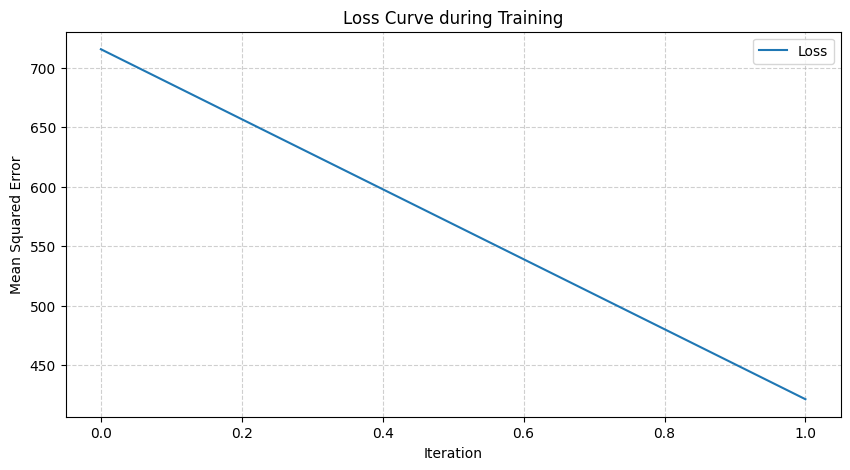

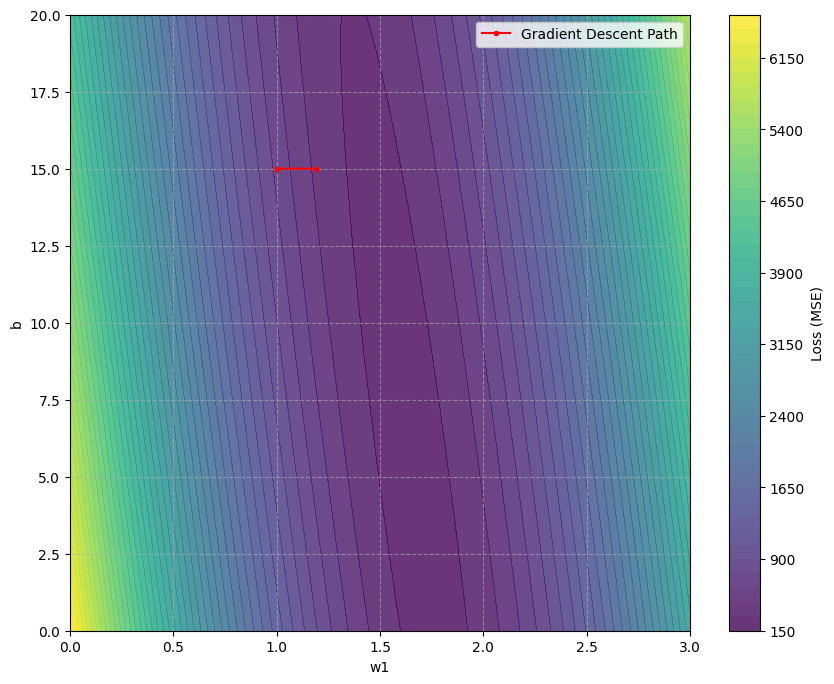

In [13]:
# --- 實作 Mini-batch Gradient Descent ---

# 1. 初始參數
w1_mini = 1
b_mini = 15

# 用來記錄訓練過程的 list
w1_history_mini = [w1_mini]
b_history_mini = [b_mini]
y_pred_mini = linear_model(x1_train, w1_mini, b_mini)
current_loss_mini = mean_squared_error(y_pred_mini, y_train)
loss_history_mini = [current_loss_mini]

# 2. 設定超參數 (Hyperparameters)
learning_rate_mini = 0.0001  # 學習率
epochs = 1      # 訓練回合數
batch_size = 20 # 設定 mini-batch 大小 (e.g., 20, 1, 5)

# 3. 訓練迴圈開始
N = float(len(x1_train)) # 資料點的數量
num_batches = int(np.ceil(N / batch_size)) # 計算 batch 的數量
for epoch in range(epochs):
    # 打亂資料順序 (確保每個 epoch 的 batch 組合不同)
    shuffle_indices = np.random.permutation(len(x1_train))
    x1_shuffled = x1_train[shuffle_indices]
    y_shuffled = y_train[shuffle_indices]

    epoch_loss = 0

    # 看過每個 mini-batch
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(x1_train)) # 處理最後一個 batch 可能不足 batch_size 的情況

        x1_batch = x1_shuffled[start_idx:end_idx]
        y_batch = y_shuffled[start_idx:end_idx]

        N_batch = float(len(x1_batch)) # 當前 batch 的資料點數量

        # a. 計算梯度 (使用當前 batch 的資料)
        y_pred_batch = linear_model(x1_batch, w1_mini, b_mini)
        grad_w1_mini = (2/N_batch) * np.sum((y_pred_batch - y_batch) * x1_batch)
        grad_b_mini = (2/N_batch) * np.sum(y_pred_batch - y_batch)

        # b. 更新參數 (更新大小取決於學習率大小和梯度大小)
        w1_mini = w1_mini - learning_rate_mini * grad_w1_mini
        b_mini = b_mini - learning_rate_mini * grad_b_mini

        # 儲存當前的狀態
        w1_history_mini.append(w1_mini)
        b_history_mini.append(b_mini)
        y_pred_batch = linear_model(x1_batch, w1_mini, b_mini)
        batch_loss = mean_squared_error(y_pred_batch, y_batch)
        loss_history_mini.append(batch_loss)

# 畫出 Loss 下降的曲線
plt.figure(figsize=(10, 5))
plt.plot(loss_history_mini, label='Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 在 Loss Surface 上畫出梯度下降的路徑
plt.figure(figsize=(10, 8))
contour = plt.contourf(W, B, losses, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Loss (MSE)')
plt.plot(w1_history_mini, b_history_mini, 'r-o', markersize=3, label='Gradient Descent Path' )
#plt.title('Gradient Descent Path on Error Surface')
plt.xlabel('w1')
plt.ylabel('b')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Limit the plot range to match the contour plot
plt.xlim(w1_range.min(), w1_range.max())
plt.ylim(b_range.min(), b_range.max())

plt.show()

## 驗證模型好壞

終於訓練出了第一個模型，在驗證資料上看看表現如何吧

In [ ]:
y_pred_val = linear_model(x1_val, w1_linear_final, b_linear_final)
loss_val = mean_squared_error(y_pred_val,y_val)

print(f"Mean Squared Error (MSE) on Validation Set: {loss_val:.2f}")

Mean Squared Error (MSE) on Validation Set: 989.21


## 改變第一步：什麼是好的

改變訓練資料和測試資料

*   《生成式人工智慧導論2024》為訓練資料
*   《生成式人工智慧與機器學習導論2025》為驗證資料

In [14]:
#訓練資料
x1_train = page_2024 #函式輸入
y_train = duration_2024 #正確答案

#驗證資料
x1_val = page_2025 #函式輸入
y_val = duration_2025 #正確答案

In [15]:
# --- 訓練 ---

# 1. 初始參數
w1 = 1
b = 15

# 用來記錄訓練過程的 list
w1_history = []
b_history = []
loss_history = []
w1_history.append(w1)
b_history.append(b)
y_pred = linear_model(x1_train, w1, b)
current_loss = mean_squared_error(y_pred, y_train)
loss_history.append(current_loss)

# 2. 設定超參數 (Hyperparameters)
learning_rate = 0.0001  # 學習率 (Learning Rate)，這個值很關鍵！#要設多少? 0.001? 0.0001? 0.00001?
#學習率太大：步伐過大，可能一步就跨過山谷，跑到對面更高的山坡上，導致 Loss 不降反升，甚至發散。
#學習率太小：就像蝸牛在爬，雖然方向很穩，但走到谷底可能要天荒地老。
epochs = 10000      # 訓練回合數

# 3. 訓練迴圈開始
N = float(len(x1_train)) # 資料點的數量
for epoch in range(epochs):

    # a. 計算梯度 (偏微分的結果)
    y_pred = linear_model(x1_train, w1, b)
    grad_w1 = (2/N) * np.sum((y_pred - y_train) * x1_train)
    grad_b = (2/N) * np.sum(y_pred - y_train)

    # d. 更新參數 (更新大小取決於學習率大小和梯度大小)
    w1 = w1 - learning_rate * grad_w1
    b = b - learning_rate * grad_b

    # b. 記錄下目前的參數和 loss
    w1_history.append(w1)
    b_history.append(b)
    y_pred = linear_model(x1_train, w1, b)
    current_loss = mean_squared_error(y_pred, y_train)
    loss_history.append(current_loss)

    # 印出目前狀況
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {current_loss:.4f}, w1: {w1:.4f}, b: {b:.4f}")

print("\n--- 訓練完成 ---")
print(f"最終訓練結果: w1 ≈ {w1:.4f}, b ≈ {b:.4f}")

w1_linear_final=w1
b_linear_final=b

Streaming output truncated to the last 5000 lines.
Epoch [5004/10000], Loss: 80.9797, w1: 0.7557, b: 13.8577
Epoch [5005/10000], Loss: 80.9792, w1: 0.7557, b: 13.8575
Epoch [5006/10000], Loss: 80.9788, w1: 0.7557, b: 13.8573
Epoch [5007/10000], Loss: 80.9783, w1: 0.7557, b: 13.8571
Epoch [5008/10000], Loss: 80.9779, w1: 0.7557, b: 13.8569
Epoch [5009/10000], Loss: 80.9774, w1: 0.7557, b: 13.8566
Epoch [5010/10000], Loss: 80.9769, w1: 0.7557, b: 13.8564
Epoch [5011/10000], Loss: 80.9765, w1: 0.7557, b: 13.8562
Epoch [5012/10000], Loss: 80.9760, w1: 0.7557, b: 13.8560
Epoch [5013/10000], Loss: 80.9756, w1: 0.7557, b: 13.8558
Epoch [5014/10000], Loss: 80.9751, w1: 0.7557, b: 13.8556
Epoch [5015/10000], Loss: 80.9746, w1: 0.7557, b: 13.8554
Epoch [5016/10000], Loss: 80.9742, w1: 0.7557, b: 13.8551
Epoch [5017/10000], Loss: 80.9737, w1: 0.7558, b: 13.8549
Epoch [5018/10000], Loss: 80.9733, w1: 0.7558, b: 13.8547
Epoch [5019/10000], Loss: 80.9728, w1: 0.7558, b: 13.8545
Epoch [5020/10000], L

In [16]:
# --- 訓練 ---
y_pred_val = linear_model(x1_val, w1_linear_final, b_linear_final)
loss_val = mean_squared_error(y_pred_val,y_val)

print(f"Mean Squared Error (MSE) on Validation Set: {loss_val:.2f}")

Mean Squared Error (MSE) on Validation Set: 349.83


## 改變第二步：畫一個更大的範圍!

加上第二個輸入，每張投影片有多少字

In [17]:
def linear_model2(x1, x2, w1, w2, b):
    """
    線性模型的預測函式
    x1: 輸入特徵 (投影片頁數)
    w1, b: 參數
    """
    return w1 * x1 + x2 * w2 + b

In [18]:
#訓練資料
x1_train = page_2024
x2_train = word_2024#/page_2024 #平均字數
y_train = duration_2024

#驗證資料
x1_val = page_2025
x2_val = word_2025#/page_2025  #平均字數
y_val = duration_2025

In [19]:
# --- 訓練 ---

# 1. 初始參數
w1 = 1
w2 = 1
b = 15

# 用來記錄訓練過程的 list
loss_history = []
y_pred = linear_model2(x1_train, x2_train, w1, w2, b)
current_loss = mean_squared_error(y_pred, y_train)
loss_history.append(current_loss)

# 2. 設定超參數 (Hyperparameters)
learning_rate = 0.0000001  # 學習率
epochs = 10000      # 訓練回合數

# 3. 訓練迴圈開始
N = float(len(x1_train)) # 資料點的數量
for epoch in range(epochs):

    # a. 計算梯度 (偏微分的結果)
    y_pred = linear_model2(x1_train, x2_train, w1, w2, b)
    grad_w1 = (2/N) * np.sum((y_pred - y_train) * x1_train)
    grad_w2 = (2/N) * np.sum((y_pred - y_train) * x2_train)
    grad_b = (2/N) * np.sum(y_pred - y_train)

    # b. 更新參數 (更新大小取決於學習率大小和梯度大小)
    w1 = w1 - learning_rate * grad_w1
    w2 = w2 - learning_rate * grad_w2
    b = b - learning_rate * grad_b

    # 記錄下目前的參數和 loss
    y_pred = linear_model2(x1_train, x2_train, w1, w2, b)
    current_loss = mean_squared_error(y_pred, y_train)
    loss_history.append(current_loss)

    # 印出目前狀況
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {current_loss:.4f}, w1: {w1:.4f}, w2: {w2:.4f}, b: {b:.4f}")

print("\n--- 訓練完成 ---")
print(f"最終訓練結果: w1 ≈ {w1:.4f}, w2 ≈ {w2:.4f}, b ≈ {b:.4f}")

Streaming output truncated to the last 5000 lines.
Epoch [5004/10000], Loss: 69.5623, w1: 0.9953, w2: -0.0056, b: 14.9988
Epoch [5005/10000], Loss: 69.5622, w1: 0.9953, w2: -0.0056, b: 14.9988
Epoch [5006/10000], Loss: 69.5621, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5007/10000], Loss: 69.5621, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5008/10000], Loss: 69.5620, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5009/10000], Loss: 69.5619, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5010/10000], Loss: 69.5618, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5011/10000], Loss: 69.5618, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5012/10000], Loss: 69.5617, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5013/10000], Loss: 69.5616, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5014/10000], Loss: 69.5615, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5015/10000], Loss: 69.5615, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5016/10000], Loss: 69.5614, w1: 0.9954, w2: -0.0056, b: 14.9988
Epoch [5017/10000], Loss: 

In [20]:
#訓練資料
x1_train = page_2024
x2_train = word_2024/page_2024 #平均字數
y_train = duration_2024

#驗證資料
x1_val = page_2025
x2_val = word_2025/page_2025  #平均字數
y_val = duration_2025

In [21]:
# --- 訓練 ---

# 1. 初始參數
w1 = 1
w2 = 1
b = 15

# 用來記錄訓練過程的 list
loss_history = []
y_pred = linear_model2(x1_train, x2_train, w1, w2, b)
current_loss = mean_squared_error(y_pred, y_train)
loss_history.append(current_loss)

# 2. 設定超參數 (Hyperparameters)
learning_rate = 0.0001  # 學習率
epochs = 10000      # 訓練回合數

# 3. 訓練迴圈開始
N = float(len(x1_train)) # 資料點的數量
for epoch in range(epochs):

    # a. 計算梯度 (偏微分的結果)
    y_pred = linear_model2(x1_train, x2_train, w1, w2, b)
    grad_w1 = (2/N) * np.sum((y_pred - y_train) * x1_train)
    grad_w2 = (2/N) * np.sum((y_pred - y_train) * x2_train)
    grad_b = (2/N) * np.sum(y_pred - y_train)

    # b. 更新參數 (更新大小取決於學習率大小和梯度大小)
    w1 = w1 - learning_rate * grad_w1
    w2 = w2 - learning_rate * grad_w2
    b = b - learning_rate * grad_b

    # 記錄下目前的參數和 loss
    y_pred = linear_model2(x1_train, x2_train, w1, w2, b)
    current_loss = mean_squared_error(y_pred, y_train)
    loss_history.append(current_loss)

    # 印出目前狀況
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {current_loss:.4f}, w1: {w1:.4f}, w2: {w2:.4f}, b: {b:.4f}")

print("\n--- 訓練完成 ---")
print(f"最終訓練結果: w1 ≈ {w1:.4f}, w2 ≈ {w2:.4f}, b ≈ {b:.4f}")

w1_final=w1
w2_final=w2
b_final=b

Streaming output truncated to the last 5000 lines.
Epoch [5004/10000], Loss: 65.2711, w1: 0.9722, w2: -0.1782, b: 14.9486
Epoch [5005/10000], Loss: 65.2711, w1: 0.9722, w2: -0.1782, b: 14.9486
Epoch [5006/10000], Loss: 65.2711, w1: 0.9722, w2: -0.1782, b: 14.9486
Epoch [5007/10000], Loss: 65.2711, w1: 0.9722, w2: -0.1782, b: 14.9486
Epoch [5008/10000], Loss: 65.2711, w1: 0.9722, w2: -0.1782, b: 14.9486
Epoch [5009/10000], Loss: 65.2711, w1: 0.9722, w2: -0.1782, b: 14.9485
Epoch [5010/10000], Loss: 65.2711, w1: 0.9722, w2: -0.1782, b: 14.9485
Epoch [5011/10000], Loss: 65.2711, w1: 0.9723, w2: -0.1782, b: 14.9485
Epoch [5012/10000], Loss: 65.2711, w1: 0.9723, w2: -0.1782, b: 14.9485
Epoch [5013/10000], Loss: 65.2710, w1: 0.9723, w2: -0.1782, b: 14.9485
Epoch [5014/10000], Loss: 65.2710, w1: 0.9723, w2: -0.1782, b: 14.9485
Epoch [5015/10000], Loss: 65.2710, w1: 0.9723, w2: -0.1782, b: 14.9485
Epoch [5016/10000], Loss: 65.2710, w1: 0.9723, w2: -0.1782, b: 14.9485
Epoch [5017/10000], Loss: 

In [22]:
# --- 驗證模型 ---
y_pred_val = linear_model2(x1_val, x2_val, w1_final, w2_final, b_final)
loss_val = mean_squared_error(y_pred_val, y_val)

print(f"Mean Squared Error (MSE) on Validation Set: {loss_val:.2f}")

Mean Squared Error (MSE) on Validation Set: 124.82


## 實作類神經網路

In [23]:
def relu(x):
    return np.maximum(0, x)

def nn_forward(X, W, b, Wp, bp):
    """
    X:  (2, N)
    W:  (H, 2)
    b:  (H, 1)
    Wp: (1, H)
    bp: (1, 1)
    A: (H,N)
    Z: (H,N)
    回傳:
      y_pred: (1, N)
      cache:  訓練時需要的中間值
    """
    Z = W @ X + b        # (H, N)
    A = relu(Z)          # (H, N)
    y_pred = Wp @ A + bp    # (1, N)
    cache = (X, Z, A)
    return y_pred, cache

In [24]:
hidden_layer_size = 100
W = np.random.randn(hidden_layer_size, 2)
b = np.random.randn(hidden_layer_size,1)
Wp = np.random.randn(1, hidden_layer_size)
bp = np.random.randn(1,1)

y_pred,cache = nn_forward(np.vstack((x1_train,x2_train)),W,b,Wp,bp)
print(y_pred)

[[-518.11377811 -411.71625161 -209.89408395 -145.36776594   -2.72970129
  -297.00584318 -338.21466423 -251.83501879 -268.98546787 -180.11627409
    58.16602434 -104.38537149   81.807572    -32.39308775 -433.325362
   -43.99703454  230.54596601 -196.40959317]]


In [25]:
def relu_grad(x):
    return (x > 0)

def nn_backward(dy, cache, W, b, Wp, bp):
    """
    dy:     (1, N) = dL/d(y_pred)
    cache:  (X, Z, A)
    回傳:   dW, db, dWp, dbp 與各自形狀相同
    """
    X, Z, A = cache
    # 輸出層：y = Wp @ A + bp
    dWp = dy @ A.T                  # (1, N) @ (N, H) = (1, H)
    dbp = dy.sum(axis=1, keepdims=True)  # (1, 1)
    dA  = Wp.T @ dy                 # (H, 1) @ (1, N) = (H, N)

    # 隱藏層：A = ReLU(Z)
    dZ = dA * relu_grad(Z)          # (H, N)

    # 第一層：Z = W @ X + b
    dW = dZ @ X.T                   # (H, N) @ (N, 2) = (H, 2)
    db = dZ.sum(axis=1, keepdims=True)   # (H, 1)

    return dW, db, dWp, dbp

hidden_layer_size = 100
W = np.random.randn(hidden_layer_size, 2)
b = np.random.randn(hidden_layer_size,1)
Wp = np.random.randn(1, hidden_layer_size)
bp = np.random.randn(1,1)

learning_rate_nn = 0.0001  # 學習率
epochs_nn = 10000      # 訓練回合數

loss_history = []

N_train = float(len(x1_train)) # 訓練資料點的數量

for epoch in range(epochs_nn):

    # forward
    X = np.vstack((x1_train,x2_train))
    y_pred, cache = nn_forward(X, W, b, Wp, bp)
    dy = (2.0 /N_train) * (y_pred - y_train)

    # backward
    dW, db, dWp, dbp = nn_backward(dy, cache, W, b, Wp, bp)

    # SGD 更新
    W  = W - learning_rate_nn * dW
    b  = b - learning_rate_nn * db
    Wp = Wp - learning_rate_nn * dWp
    bp = bp -  learning_rate_nn * dbp

    y_pred, cache = nn_forward(X, W, b, Wp, bp)
    loss = mean_squared_error(y_pred,y_train)
    loss_history.append(loss)

    print(f"Epoch [{epoch+1}/{epochs_nn}], Loss: {loss:.4f}")



Streaming output truncated to the last 5000 lines.
Epoch [5001/10000], Loss: 463.1348
Epoch [5002/10000], Loss: 463.0336
Epoch [5003/10000], Loss: 462.9325
Epoch [5004/10000], Loss: 462.8313
Epoch [5005/10000], Loss: 462.7302
Epoch [5006/10000], Loss: 462.6292
Epoch [5007/10000], Loss: 462.5282
Epoch [5008/10000], Loss: 462.4272
Epoch [5009/10000], Loss: 462.3263
Epoch [5010/10000], Loss: 462.2254
Epoch [5011/10000], Loss: 462.1246
Epoch [5012/10000], Loss: 462.0238
Epoch [5013/10000], Loss: 461.9230
Epoch [5014/10000], Loss: 461.8223
Epoch [5015/10000], Loss: 461.7216
Epoch [5016/10000], Loss: 461.6210
Epoch [5017/10000], Loss: 461.5204
Epoch [5018/10000], Loss: 461.4198
Epoch [5019/10000], Loss: 461.3193
Epoch [5020/10000], Loss: 461.2188
Epoch [5021/10000], Loss: 461.1183
Epoch [5022/10000], Loss: 461.0179
Epoch [5023/10000], Loss: 460.9176
Epoch [5024/10000], Loss: 460.8173
Epoch [5025/10000], Loss: 460.7170
Epoch [5026/10000], Loss: 460.6167
Epoch [5027/10000], Loss: 460.5165
Epoc

In [26]:
H = 100            # 隱藏層大小，可自行調整
in_dim = 2        # 輸入維度 x1, x2
out_dim = 1       # 輸出維度

rng = np.random.default_rng(42)  # 可重現性

# 第一層（ReLU 前）：He/Kaiming Normal，std = sqrt(2 / fan_in)
W = rng.normal(loc=0.0, scale=np.sqrt(2.0 / in_dim), size=(H, in_dim))
b = np.zeros((H, 1))

# 輸出層（線性）：Glorot/Xavier Normal，std = sqrt(2 / (fan_in + fan_out))
Wp = rng.normal(loc=0.0, scale=np.sqrt(2.0 / (H + out_dim)), size=(out_dim, H))
bp = np.zeros((out_dim, 1))

# === Adam 參數 ===
learning_rate_nn = 0.01
epochs_nn = 1000
beta1 = 0.9
beta2 = 0.999
eps = 1e-8

loss_history = []

N_train = float(len(x1_train))

# 初始化 Adam 的一階與二階動量
mW = np.zeros_like(W)
mb = np.zeros_like(b)
mWp = np.zeros_like(Wp)
mbp = np.zeros_like(bp)

vW = np.zeros_like(W)
vb = np.zeros_like(b)
vWp = np.zeros_like(Wp)
vbp = np.zeros_like(bp)

for epoch in range(1, epochs_nn + 1):

    # forward
    X = np.vstack((x1_train, x2_train))
    y_pred, cache = nn_forward(X, W, b, Wp, bp)
    dy = (2.0 / N_train) * (y_pred - y_train)

    # backward
    dW, db, dWp, dbp = nn_backward(dy, cache, W, b, Wp, bp)

    # === Adam 更新 ===
    # 更新一階動量 (m)
    mW = beta1 * mW + (1 - beta1) * dW
    mb = beta1 * mb + (1 - beta1) * db
    mWp = beta1 * mWp + (1 - beta1) * dWp
    mbp = beta1 * mbp + (1 - beta1) * dbp

    # 更新二階動量 (v)
    vW = beta2 * vW + (1 - beta2) * (dW ** 2)
    vb = beta2 * vb + (1 - beta2) * (db ** 2)
    vWp = beta2 * vWp + (1 - beta2) * (dWp ** 2)
    vbp = beta2 * vbp + (1 - beta2) * (dbp ** 2)

    # 偏差修正 (bias correction)
    mW_hat = mW / (1 - beta1 ** epoch)
    mb_hat = mb / (1 - beta1 ** epoch)
    mWp_hat = mWp / (1 - beta1 ** epoch)
    mbp_hat = mbp / (1 - beta1 ** epoch)

    vW_hat = vW / (1 - beta2 ** epoch)
    vb_hat = vb / (1 - beta2 ** epoch)
    vWp_hat = vWp / (1 - beta2 ** epoch)
    vbp_hat = vbp / (1 - beta2 ** epoch)

    # 更新參數
    W  -= learning_rate_nn * mW_hat / (np.sqrt(vW_hat) + eps)
    b  -= learning_rate_nn * mb_hat / (np.sqrt(vb_hat) + eps)
    Wp -= learning_rate_nn * mWp_hat / (np.sqrt(vWp_hat) + eps)
    bp -= learning_rate_nn * mbp_hat / (np.sqrt(vbp_hat) + eps)

    # 計算 Loss
    y_pred, cache = nn_forward(X, W, b, Wp, bp)
    loss = mean_squared_error(y_pred, y_train)
    loss_history.append(loss)

    print(f"Epoch [{epoch}/{epochs_nn}], Loss: {loss:.6f}")

Epoch [1/1000], Loss: 431.068268
Epoch [2/1000], Loss: 641.554688
Epoch [3/1000], Loss: 529.940878
Epoch [4/1000], Loss: 300.254327
Epoch [5/1000], Loss: 208.175640
Epoch [6/1000], Loss: 258.744479
Epoch [7/1000], Loss: 292.436561
Epoch [8/1000], Loss: 233.364717
Epoch [9/1000], Loss: 144.608354
Epoch [10/1000], Loss: 109.691056
Epoch [11/1000], Loss: 141.801209
Epoch [12/1000], Loss: 182.331751
Epoch [13/1000], Loss: 179.358243
Epoch [14/1000], Loss: 142.046098
Epoch [15/1000], Loss: 114.046498
Epoch [16/1000], Loss: 120.577655
Epoch [17/1000], Loss: 145.197561
Epoch [18/1000], Loss: 154.165088
Epoch [19/1000], Loss: 136.181649
Epoch [20/1000], Loss: 109.858995
Epoch [21/1000], Loss: 98.164759
Epoch [22/1000], Loss: 104.081909
Epoch [23/1000], Loss: 111.103930
Epoch [24/1000], Loss: 104.547297
Epoch [25/1000], Loss: 87.573395
Epoch [26/1000], Loss: 74.724481
Epoch [27/1000], Loss: 74.148672
Epoch [28/1000], Loss: 79.851570
Epoch [29/1000], Loss: 80.548006
Epoch [30/1000], Loss: 73.171

In [27]:
# --- 驗證模型 ---
y_pred_val, cache = nn_forward(np.vstack((x1_val, x2_val)), W, b, Wp, bp)
loss_val = mean_squared_error(y_pred_val, y_val)

print(f"Mean Squared Error (MSE) on Validation Set: {loss_val:.2f}")

Mean Squared Error (MSE) on Validation Set: 1306.57


Epoch [1/500], Loss: 431.068268
Mean Squared Error (MSE) on Validation Set: 4485.07
Epoch [2/500], Loss: 641.554688
Mean Squared Error (MSE) on Validation Set: 2737.17
Epoch [3/500], Loss: 529.940878
Mean Squared Error (MSE) on Validation Set: 2232.25
Epoch [4/500], Loss: 300.254327
Mean Squared Error (MSE) on Validation Set: 2222.61
Epoch [5/500], Loss: 208.175640
Mean Squared Error (MSE) on Validation Set: 2514.94
Epoch [6/500], Loss: 258.744479
Mean Squared Error (MSE) on Validation Set: 2745.10
Epoch [7/500], Loss: 292.436561
Mean Squared Error (MSE) on Validation Set: 2532.98
Epoch [8/500], Loss: 233.364717
Mean Squared Error (MSE) on Validation Set: 1885.76
Epoch [9/500], Loss: 144.608354
Mean Squared Error (MSE) on Validation Set: 1105.37
Epoch [10/500], Loss: 109.691056
Mean Squared Error (MSE) on Validation Set: 489.24
Epoch [11/500], Loss: 141.801209
Mean Squared Error (MSE) on Validation Set: 159.44
Epoch [12/500], Loss: 182.331751
Mean Squared Error (MSE) on Validation Set:

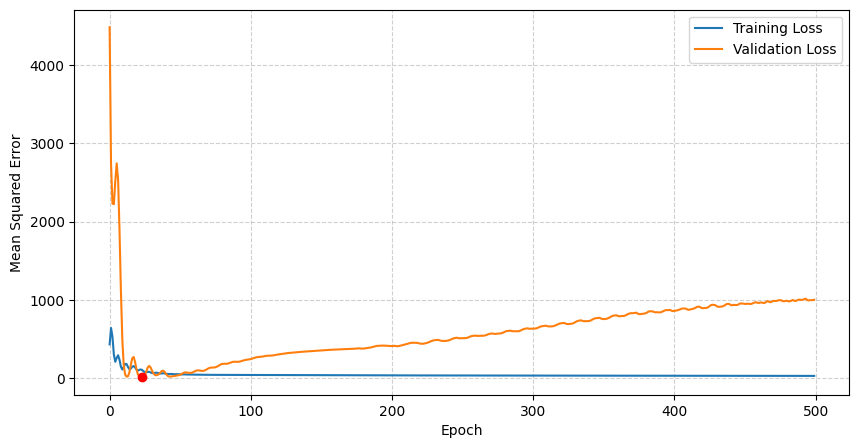

Min Val Loss: 11.35 at Epoch 23


In [28]:
H = 100            # 隱藏層大小，可自行調整
in_dim = 2        # 輸入維度 x1, x2
out_dim = 1       # 輸出維度
rng = np.random.default_rng(42)  # 可重現性

# 第一層（ReLU 前）：He/Kaiming Normal，std = sqrt(2 / fan_in)
W = rng.normal(loc=0.0, scale=np.sqrt(2.0 / in_dim), size=(H, in_dim))
b = np.zeros((H, 1))

# 輸出層（線性）：Glorot/Xavier Normal，std = sqrt(2 / (fan_in + fan_out))
Wp = rng.normal(loc=0.0, scale=np.sqrt(2.0 / (H + out_dim)), size=(out_dim, H))
bp = np.zeros((out_dim, 1))

# === Adam 參數 ===
learning_rate_nn = 0.01
epochs_nn = 500 #讓驗證資料最好的數目是23
beta1 = 0.9
beta2 = 0.999
eps = 1e-8

loss_history = []
loss_val_history = []
N_train = float(len(x1_train))

# 初始化 Adam 的一階與二階動量
mW = np.zeros_like(W)
mb = np.zeros_like(b)
mWp = np.zeros_like(Wp)
mbp = np.zeros_like(bp)

vW = np.zeros_like(W)
vb = np.zeros_like(b)
vWp = np.zeros_like(Wp)
vbp = np.zeros_like(bp)

for epoch in range(1, epochs_nn + 1):

    # forward
    X = np.vstack((x1_train, x2_train))
    y_pred, cache = nn_forward(X, W, b, Wp, bp)
    dy = (2.0 / N_train) * (y_pred - y_train)

    # backward
    dW, db, dWp, dbp = nn_backward(dy, cache, W, b, Wp, bp)

    # === Adam 更新 ===
    # 更新一階動量 (m)
    mW = beta1 * mW + (1 - beta1) * dW
    mb = beta1 * mb + (1 - beta1) * db
    mWp = beta1 * mWp + (1 - beta1) * dWp
    mbp = beta1 * mbp + (1 - beta1) * dbp

    # 更新二階動量 (v)
    vW = beta2 * vW + (1 - beta2) * (dW ** 2)
    vb = beta2 * vb + (1 - beta2) * (db ** 2)
    vWp = beta2 * vWp + (1 - beta2) * (dWp ** 2)
    vbp = beta2 * vbp + (1 - beta2) * (dbp ** 2)

    # 偏差修正 (bias correction)
    mW_hat = mW / (1 - beta1 ** epoch)
    mb_hat = mb / (1 - beta1 ** epoch)
    mWp_hat = mWp / (1 - beta1 ** epoch)
    mbp_hat = mbp / (1 - beta1 ** epoch)

    vW_hat = vW / (1 - beta2 ** epoch)
    vb_hat = vb / (1 - beta2 ** epoch)
    vWp_hat = vWp / (1 - beta2 ** epoch)
    vbp_hat = vbp / (1 - beta2 ** epoch)

    # 更新參數
    W  -= learning_rate_nn * mW_hat / (np.sqrt(vW_hat) + eps)
    b  -= learning_rate_nn * mb_hat / (np.sqrt(vb_hat) + eps)
    Wp -= learning_rate_nn * mWp_hat / (np.sqrt(vWp_hat) + eps)
    bp -= learning_rate_nn * mbp_hat / (np.sqrt(vbp_hat) + eps)

    # 計算 Loss
    y_pred, cache = nn_forward(X, W, b, Wp, bp)
    loss = mean_squared_error(y_pred, y_train)
    loss_history.append(loss)

    print(f"Epoch [{epoch}/{epochs_nn}], Loss: {loss:.6f}")
    y_pred_val, cache = nn_forward(np.vstack((x1_val, x2_val)), W, b, Wp, bp)
    loss_val = mean_squared_error(y_pred_val, y_val)
    loss_val_history.append(loss_val)
    print(f"Mean Squared Error (MSE) on Validation Set: {loss_val:.2f}")

# --- 視覺化訓練過程 ---

# 畫出 Training Loss 和 Validation Loss 的曲線
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.plot(loss_val_history, label='Validation Loss')
#plt.title('Loss Curves during Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Find the minimum validation loss and its epoch
min_loss_val = min(loss_val_history)
min_epoch_val = loss_val_history.index(min_loss_val)

# Mark the minimum validation loss on the plot
plt.plot(min_epoch_val, min_loss_val, 'ro') # 'ro' for red circle marker

plt.show()

# Print the minimum validation loss
print(f'Min Val Loss: {min_loss_val:.2f} at Epoch {min_epoch_val}')

## 真的來測試模型

前一個 block 並沒有實作將驗證資料上表現最好的模型儲存下來這件事，因此在進行測試前，請先回到前一個 block，將 epoch 數改為在驗證資料上能得到最佳結果的 epoch 數，並重新訓練一次模型。


In [29]:
# --- 驗證模型 ---
page_this = np.array([84]) #填入投影片頁數
word_this  = np.array([3388]) #填入投影片總字數

x1_test=page_this
x2_test=word_this/page_this

y_pred_test, cache = nn_forward(np.vstack((x1_test, x2_test)), W, b, Wp, bp)
print(y_pred_test)

#正確答案: 2:23 - 3:25 = 62, 3:35 - 4:20 = 45, 107

[[140.42926974]]
